# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

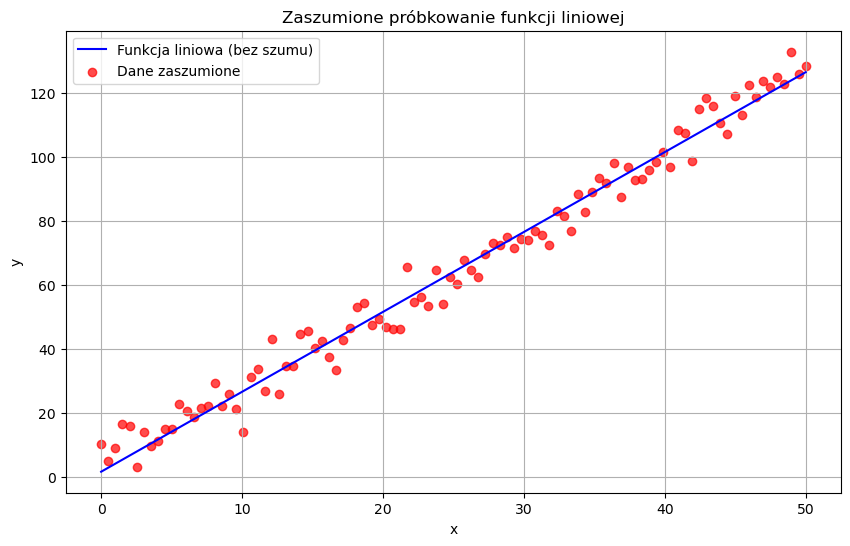

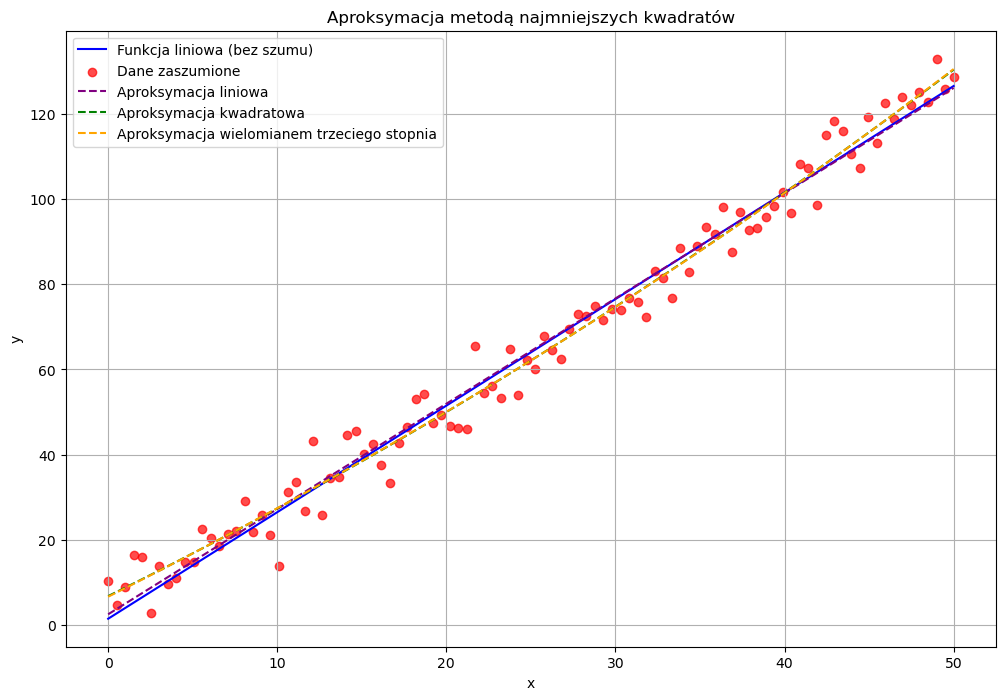

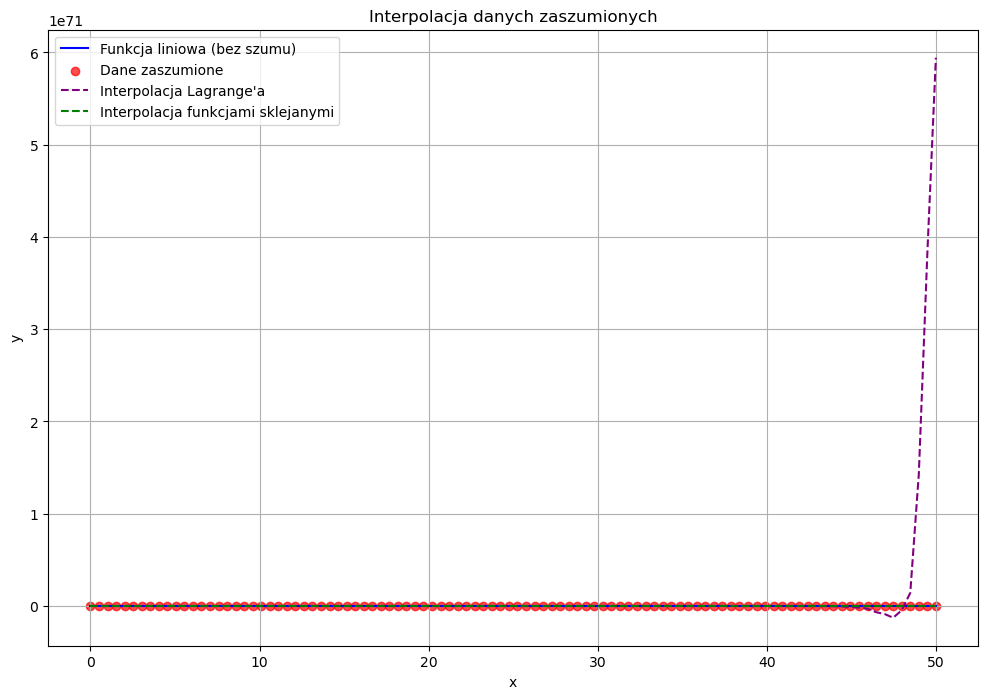

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

# Definicja funkcji liniowej y = a*x + b
def linear_func(x, a, b):
    return a * x + b

# Generacja danych
np.random.seed(0)  # Ustawienie ziarna dla powtarzalności wyników

x = np.linspace(0, 50, 100)
a_true = 2.5
b_true = 1.5
y_true = linear_func(x, a_true, b_true)

# Dodanie szumu do danych
noise = np.random.normal(0, 5, 100)  # szum gaussowski
y_noisy = y_true + noise

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Funkcja liniowa (bez szumu)', color='blue')
plt.scatter(x, y_noisy, label='Dane zaszumione', color='red', alpha=0.7)
plt.title('Zaszumione próbkowanie funkcji liniowej')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Aproksymacja funkcją liniową (a*x + b)
params_lin, covariance_lin = curve_fit(linear_func, x, y_noisy)
a_lin, b_lin = params_lin

y_fit_lin = linear_func(x, a_lin, b_lin)

# Definicja funkcji kwadratowej y = a*x^2 + b*x + c
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Aproksymacja funkcją kwadratową
params_quad, covariance_quad = curve_fit(quadratic_func, x, y_noisy)
a_quad, b_quad, c_quad = params_quad

y_fit_quad = quadratic_func(x, a_quad, b_quad, c_quad)

# Definicja funkcji wielomianowej trzeciego stopnia
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Aproksymacja wielomianem trzeciego stopnia
params_cubic, covariance_cubic = curve_fit(cubic_func, x, y_noisy)
a_cubic, b_cubic, c_cubic, d_cubic = params_cubic

y_fit_cubic = cubic_func(x, a_cubic, b_cubic, c_cubic, d_cubic)

plt.figure(figsize=(12, 8))
plt.plot(x, y_true, label='Funkcja liniowa (bez szumu)', color='blue')
plt.scatter(x, y_noisy, label='Dane zaszumione', color='red', alpha=0.7)
plt.plot(x, y_fit_lin, '--', label='Aproksymacja liniowa', color='purple')
plt.plot(x, y_fit_quad, '--', label='Aproksymacja kwadratowa', color='green')
plt.plot(x, y_fit_cubic, '--', label='Aproksymacja wielomianem trzeciego stopnia', color='orange')
plt.title('Aproksymacja metodą najmniejszych kwadratów')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Interpolacja wielomianem Lagrange'a
poly_lagrange = lagrange(x, y_noisy)
y_interp_lagrange = poly_lagrange(x)

# Interpolacja funkcjami sklejanymi
interp_spline = interp1d(x, y_noisy, kind='cubic')
y_interp_spline = interp_spline(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y_true, label='Funkcja liniowa (bez szumu)', color='blue')
plt.scatter(x, y_noisy, label='Dane zaszumione', color='red', alpha=0.7)
plt.plot(x, y_interp_lagrange, '--', label='Interpolacja Lagrange\'a', color='purple')
plt.plot(x, y_interp_spline, '--', label='Interpolacja funkcjami sklejanymi', color='green')
plt.title('Interpolacja danych zaszumionych')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

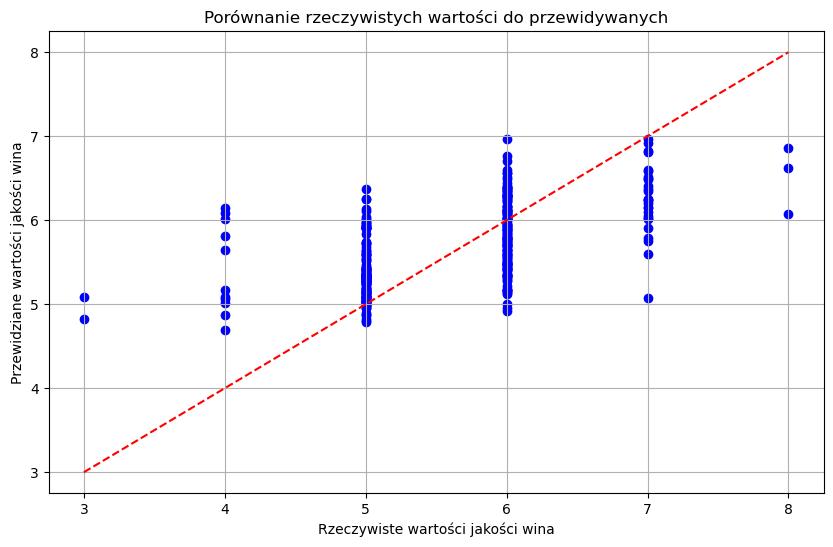

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Załaduj dane z pliku CSV
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Wypisz kilka pierwszych wierszy danych
print(df.head())

# Wstępne przygotowanie danych
# Zakładamy, że chcemy przewidywać jakość wina na podstawie innych cech
X = df.drop('quality', axis=1)  # cechy
y = df['quality']  # etykieta (jakość wina)

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Współczynniki modelu
print('Współczynniki modelu:')
print('Intercept (b):', model.intercept_)
print('Wagi (a):', model.coef_)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('\nMSE (Mean Squared Error):', mse)
print('R^2 Score:', r2)

# Wykres porównujący rzeczywiste wartości do przewidywanych
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Rzeczywiste wartości jakości wina')
plt.ylabel('Przewidziane wartości jakości wina')
plt.title('Porównanie rzeczywistych wartości do przewidywanych')
plt.grid(True)
plt.show()
